In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM


In [2]:
df = pd.read_csv('/content/Extract.xlsx - Sheet1.csv')
X = df[['x1','x2','x3','x4']]
Y = df['y']

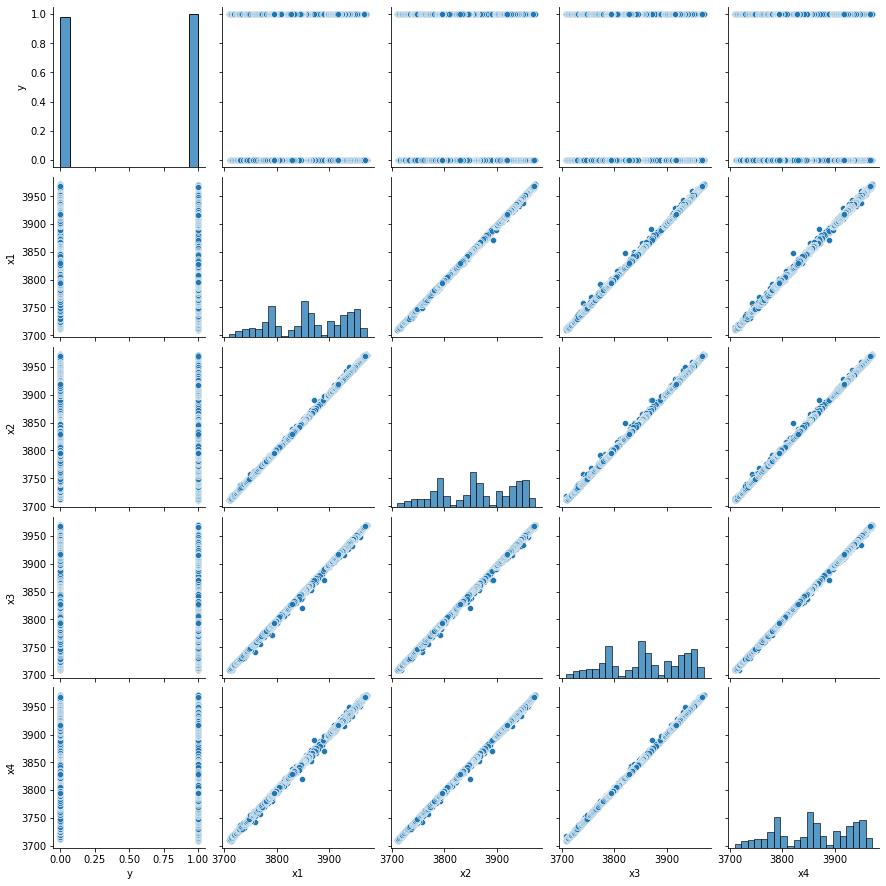

In [3]:
sns.pairplot(df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Different Models Tried

In [5]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.5205

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.492

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [8]:
Y_train = to_categorical(y_train, num_classes=2)
Y_test = to_categorical(y_test, num_classes=2)

In [9]:
def get_model(num_classes = 2):
  model = Sequential()
  model.add(Dense(8, input_shape=(4,), activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.1)))
  #tf.keras.layers.BatchNormalization()
  #model.add(tf.keras.layers.Dropout(rate=0.5, seed=42))
  #model.add(Dense(8, activation='sigmoid',activity_regularizer=tf.keras.regularizers.L2(0.1)))

  model.add(Dense(4, activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.1)))
  
  #tf.keras.layers.BatchNormalization()
  #model.add(tf.keras.layers.Dropout(rate=0.5, seed=42))
  model.add(Dense(2,activation='softmax'))
  #model.add(Dense(num_classes, activation='relu'))

  return model
model = get_model()
model.compile(loss ='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=200, validation_split=0.2)
count = 0
for pred,lbl in zip(model.predict(X_test),y_test):
  if pred.argmax() == lbl :
    count +=1
print(count/y_test.shape[0])

Epoch 1/100
32/32 [==============================] - 2s 22ms/step - loss: 1007964.5000 - accuracy: 0.4978 - val_loss: 340.0293 - val_accuracy: 0.4938
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 11.3343 - accuracy: 0.4978 - val_loss: 0.6937 - val_accuracy: 0.4938
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4978 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5063
Epo

In [10]:
!pip install catboost
from catboost import CatBoostRegressor
#@title Default title text
model = CatBoostRegressor(iterations=10,
                          learning_rate=1,
                          depth=7)
model.fit(X_train, y_train)
model.score(X_test,y_test)

     |████████████████████████████████| 76.1 MB 1.2 MB/s 
0:	learn: 0.4997915	total: 54.4ms	remaining: 489ms
1:	learn: 0.4993110	total: 59ms	remaining: 236ms
2:	learn: 0.4990541	total: 68.3ms	remaining: 159ms
3:	learn: 0.4987684	total: 77.7ms	remaining: 117ms
4:	learn: 0.4983787	total: 83.5ms	remaining: 83.5ms
5:	learn: 0.4980967	total: 96.9ms	remaining: 64.6ms
6:	learn: 0.4978811	total: 107ms	remaining: 45.8ms
7:	learn: 0.4974123	total: 124ms	remaining: 30.9ms
8:	learn: 0.4972531	total: 132ms	remaining: 14.6ms
9:	learn: 0.4966780	total: 142ms	remaining: 0us


-0.00954406999232682

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
kmeans.labels_



#kmeans.cluster_centers_
kmeans.score(X_test,y_test)

-1970991.4902692302

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1,solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(10,5), max_iter=300).fit(X_train, y_train)
clf.score(X_test,y_test)

0.543

10,5 - 54.25 1e-3

In [15]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.4935

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf = clf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.4935

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10,
    random_state=0).fit(X_train,y_train)
clf.score(X_test,y_test)

0.506

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',solver='liblinear')
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.543

lr = LogisticRegression(penalty='l2',solver='liblinear') <br> 
54.3


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.5075

In [21]:
from sklearn.ensemble import StackingClassifier
lr1 = LogisticRegression(penalty='l2',solver='liblinear')
dt1 = DecisionTreeClassifier(max_depth=5, min_samples_split=10,random_state=0)
rf1 = RandomForestClassifier(n_estimators=20)
clf1 = MLPClassifier(random_state=1,solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(10,5), max_iter=200)
neigh1 = KNeighborsClassifier(n_neighbors=5)
estimators = [('mlp', clf1), ('rf', rf1),('knn', neigh1),('dt', dt1)]
sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
sc.fit(X_train, y_train).score(X_test, y_test)

0.517

#Final Models used as an ensemble 

In [25]:
from sklearn.ensemble import  VotingClassifier
lr1 = LogisticRegression(penalty='l2',solver='liblinear')
dt1 = DecisionTreeClassifier(max_depth=5, min_samples_split=10,random_state=0)
rf1 = RandomForestClassifier(n_estimators=20)
clf1 = MLPClassifier(random_state=1,solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(10,5), max_iter=300)


eclf1 = VotingClassifier(estimators=[('lr', lr1), ('mlp', clf1), ('rf', rf1)], voting='hard',weights=[1.5,1,1],flatten_transform=True)
eclf1 = eclf1.fit(X_train, y_train)
eclf1.score(X_test,y_test)

0.5495

54.7

# Generating predictions and saving in CSV file

In [40]:
import pickle
with open('model_final.h5', 'wb') as fid:
    pickle.dump(eclf1, fid)   

In [41]:
with open('model_final.h5', 'rb') as fid:
    voting_classifier = pickle.load(fid)
voting_classifier.score(X_test,y_test)

0.5495

In [64]:
df_test  = pd.read_csv('/content/test_data_Analytics GC.xlsx - Sheet1.csv')
df_test_result = pd.DataFrame({'y': eclf1.predict(df_test[['x1','x2','x3','x4']])})
df_test_result.to_csv('final_preds.csv',index=False)